In [1]:
import pandas as pd
from soil_roughness_change_detection.modules.preprocessor import (
    preprocess_backscatter,
    preprocess_harrysfarm_activity_log,
    preprocess_ndvi,
    preprocess_precipitation
)
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
training_period_from = '2018-12-31'
training_period_to = '2020-12-31'
testing_period_to = '2022-12-31'
s1_file_path = './data/harrysfarm/harrysfarm_fields_s1.pkl'
farm_activity_annotation_path = './data/harrysfarm_tillage_activity.csv'
random_state = 123

In [3]:
df = pd.read_pickle(s1_file_path)
training_df, testing_df = preprocess_backscatter(
    df,
    training_period_from=training_period_from,
    training_period_to=training_period_to,
    testing_period_from=training_period_to,
    testing_period_to=testing_period_to
)
training_interval_df = training_df.reset_index()[['from_date', 'date']]\
    .groupby(['from_date', 'date']).first().reset_index()

testing_interval_df = testing_df.reset_index()[['from_date', 'date']]\
    .groupby(['from_date', 'date']).first().reset_index()

In [4]:
tillage_df = pd.read_csv(farm_activity_annotation_path)

train_tillage_df, test_tillage_df = preprocess_harrysfarm_activity_log(
    tillage_df,
    training_period_from=training_period_from,
    training_period_to=training_period_to,
    testing_period_from=training_period_to,
    testing_period_to=testing_period_to
)
print('Number of training events:', train_tillage_df.shape[0])
print('Number of testing events:', test_tillage_df.shape[0])

Number of training events: 31
Number of testing events: 41


In [5]:
ndvi_df = pd.read_pickle('./data/harrysfarm/harrysfarm_fields_ndvi.pkl').reset_index()
training_ndvi_df, testing_ndvi_df = preprocess_ndvi(
    ndvi_df,
    training_period_from=training_period_from,
    training_period_to=training_period_to,
    testing_period_from=training_period_to,
    testing_period_to=testing_period_to
)

In [6]:
precipitation_df = pd.read_pickle('./data/harrysfarm/harrysfarm_precitipation.pkl').reset_index()
training_precipitation_df, testing_precipitation_df = preprocess_precipitation(
    precipitation_df,
    training_period_from=training_period_from,
    training_period_to=training_period_to,
    testing_period_from=training_period_to,
    testing_period_to=testing_period_to
)

In [7]:
tillage_df = pd.read_csv(farm_activity_annotation_path)

train_tillage_df, test_tillage_df = preprocess_harrysfarm_activity_log(
    tillage_df,
    training_period_from=training_period_from,
    training_period_to=training_period_to,
    testing_period_from=training_period_to,
    testing_period_to=testing_period_to
)
print('Number of training events:', train_tillage_df.shape[0])
print('Number of testing events:', test_tillage_df.shape[0])

Number of training events: 31
Number of testing events: 41


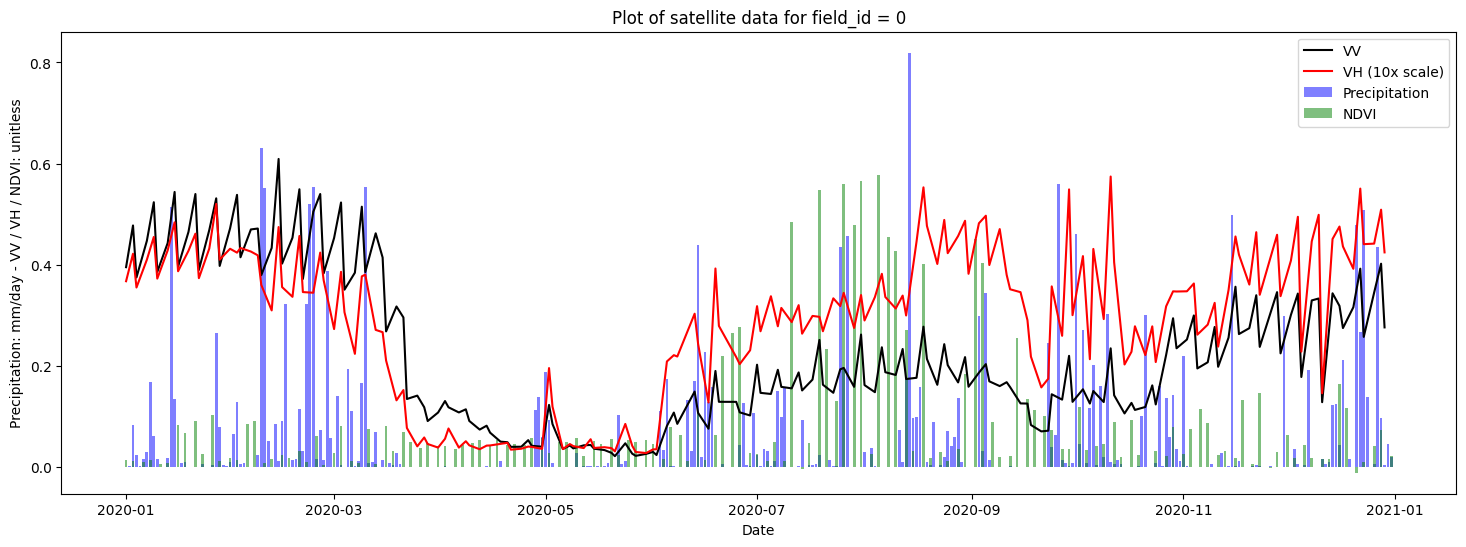

In [20]:
field_id = 0
year = 2020
fig, ax = plt.subplots(figsize=(18, 6))
backscatter_df = training_df.xs(field_id, level=1).loc[f'{year}']
x = backscatter_df.index
y = backscatter_df['VV']
# scaled_y = StandardScaler().fit_transform(y.values.reshape(-1, 1))
ax.plot(x, y, color='black', label='VV')

x = backscatter_df.index
y = backscatter_df['VH'] * 10
# scaled_y = StandardScaler().fit_transform(y.values.reshape(-1, 1))
ax.plot(x, y, color='red', label='VH (10x scale)')


plot_precipitation_df = training_precipitation_df.loc[f'{year}']
# precipitation = plot_precipitation_df.precipitation.rolling(10).mean()
# ax.plot(plot_precipitation_df.date, precipitation, color='blue', alpha=0.5, label='Precipitation')

ax.bar(plot_precipitation_df.index, plot_precipitation_df.precipitation, color='blue', alpha=0.5, label='Precipitation')

# soils which generally exhibit a near-infrared spectral reflectance somewhat larger than the red,
# and thus tend to also generate rather small positive NDVI values (say 0.1 to 0.2).
plot_ndvi_df = training_ndvi_df.xs(field_id, level=1).loc[f'{year}']
# NDVI = plot_ndvi_df.NDVI.rolling(3).mean()
# ax.plot(plot_ndvi_df.date, NDVI, color='green', alpha=0.5, label='NDVI')
ax.bar(plot_ndvi_df.index, plot_ndvi_df.NDVI, color='green', alpha=0.5, label='NDVI')

# ax.axhline(y=0.1, xmin=0.05, xmax=0.95, color='orange', label='0.1 level')

ax.set_xlabel('Date')
ax.set_ylabel('Precipitation: mm/day - VV / VH / NDVI: unitless')
ax.set_title(f'Plot of satellite data for field_id = {field_id}')
ax.legend()

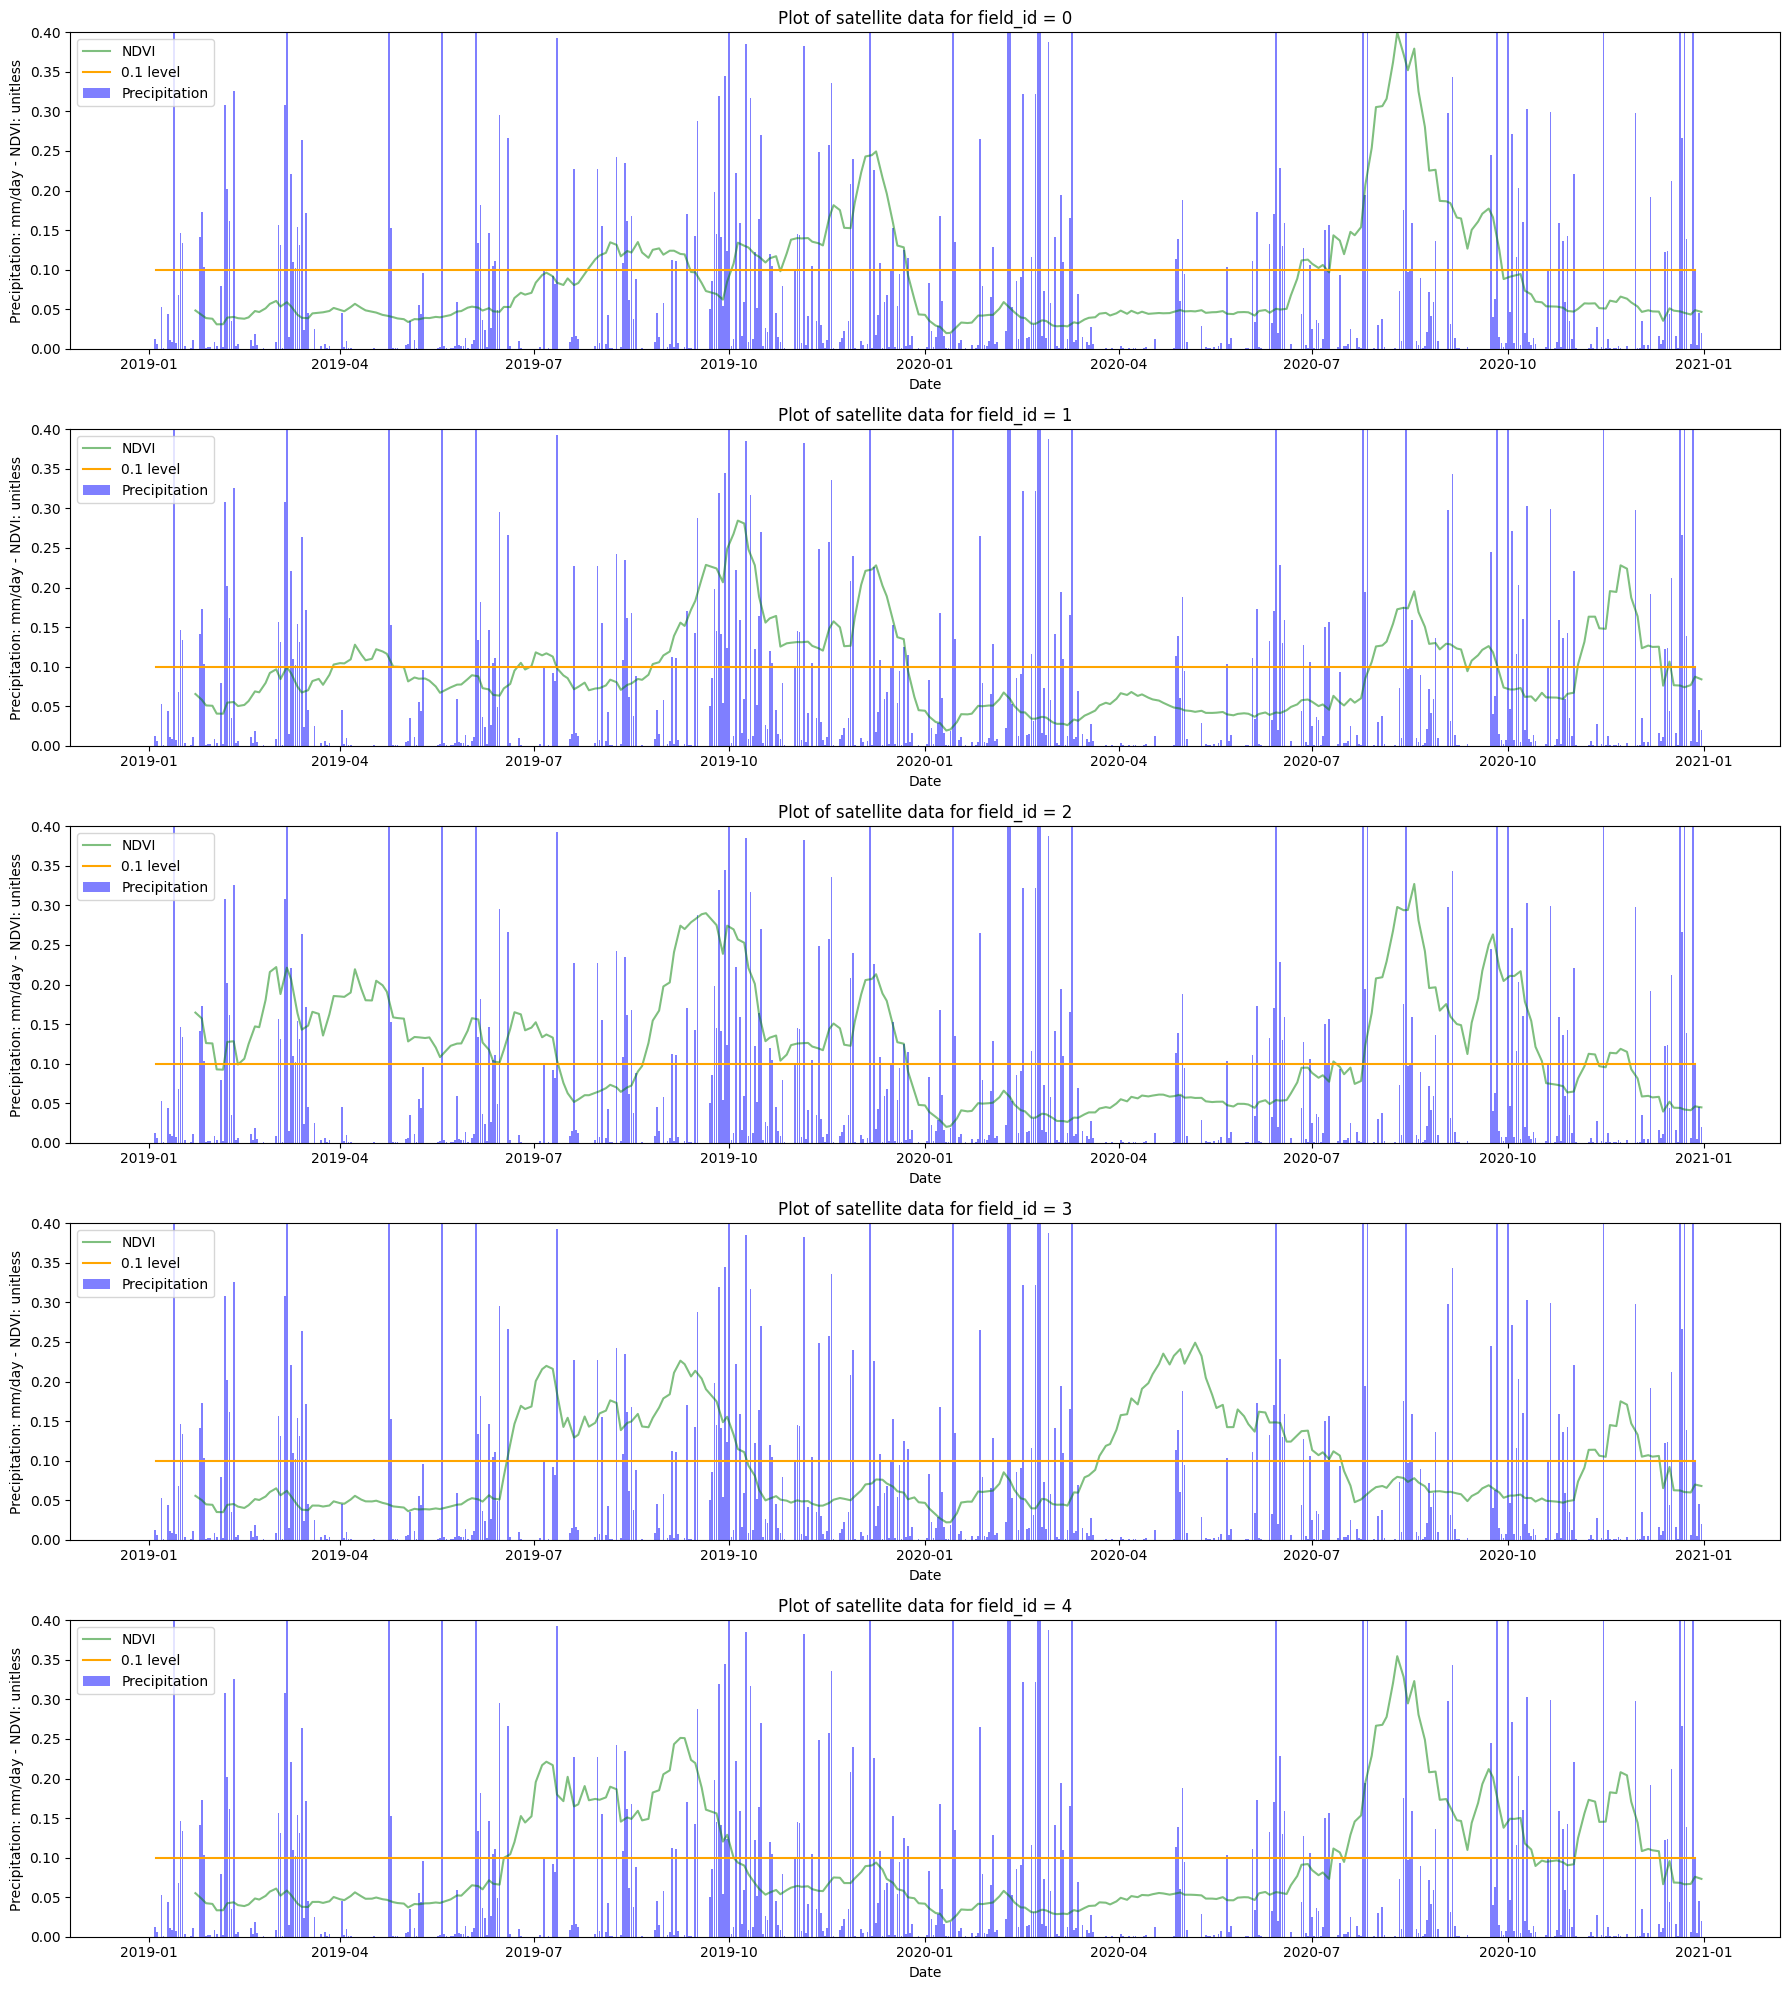

In [23]:
fig, axes = plt.subplots(5, 1, figsize=(18, 4 * 5))
for field_id in range(5):
    plot_precipitation_df = training_precipitation_df
    precipitation = plot_precipitation_df.precipitation.rolling(1).mean()
    # axes[field_id].plot(plot_precipitation_df.date, precipitation, color='blue', alpha=0.5, label='Precipitation')

    axes[field_id].bar(
        plot_precipitation_df.index,
        plot_precipitation_df.precipitation,
        color='blue',
        alpha=0.5,
        label='Precipitation'
    )

    # soils which generally exhibit a near-infrared spectral reflectance somewhat larger than the red,
    # and thus tend to also generate rather small positive NDVI values (say 0.1 to 0.2).
    plot_ndvi_df = training_ndvi_df.xs(field_id, level=1)
    NDVI = plot_ndvi_df.NDVI.rolling(10).mean()
    axes[field_id].plot(plot_ndvi_df.index, NDVI, color='green', alpha=0.5, label='NDVI')
    # ax.bar(plot_ndvi_df.date, plot_ndvi_df.NDVI, color='green', alpha=0.5, label='NDVI')

    axes[field_id].axhline(y=0.1, xmin=0.05, xmax=0.95, color='orange', label='0.1 level')

    axes[field_id].set_xlabel('Date')
    axes[field_id].set_ylabel('Precipitation: mm/day - NDVI: unitless')
    axes[field_id].set_title(f'Plot of satellite data for field_id = {field_id}')
    axes[field_id].legend()
    axes[field_id].set_ylim([0, 0.4])
plt.tight_layout()

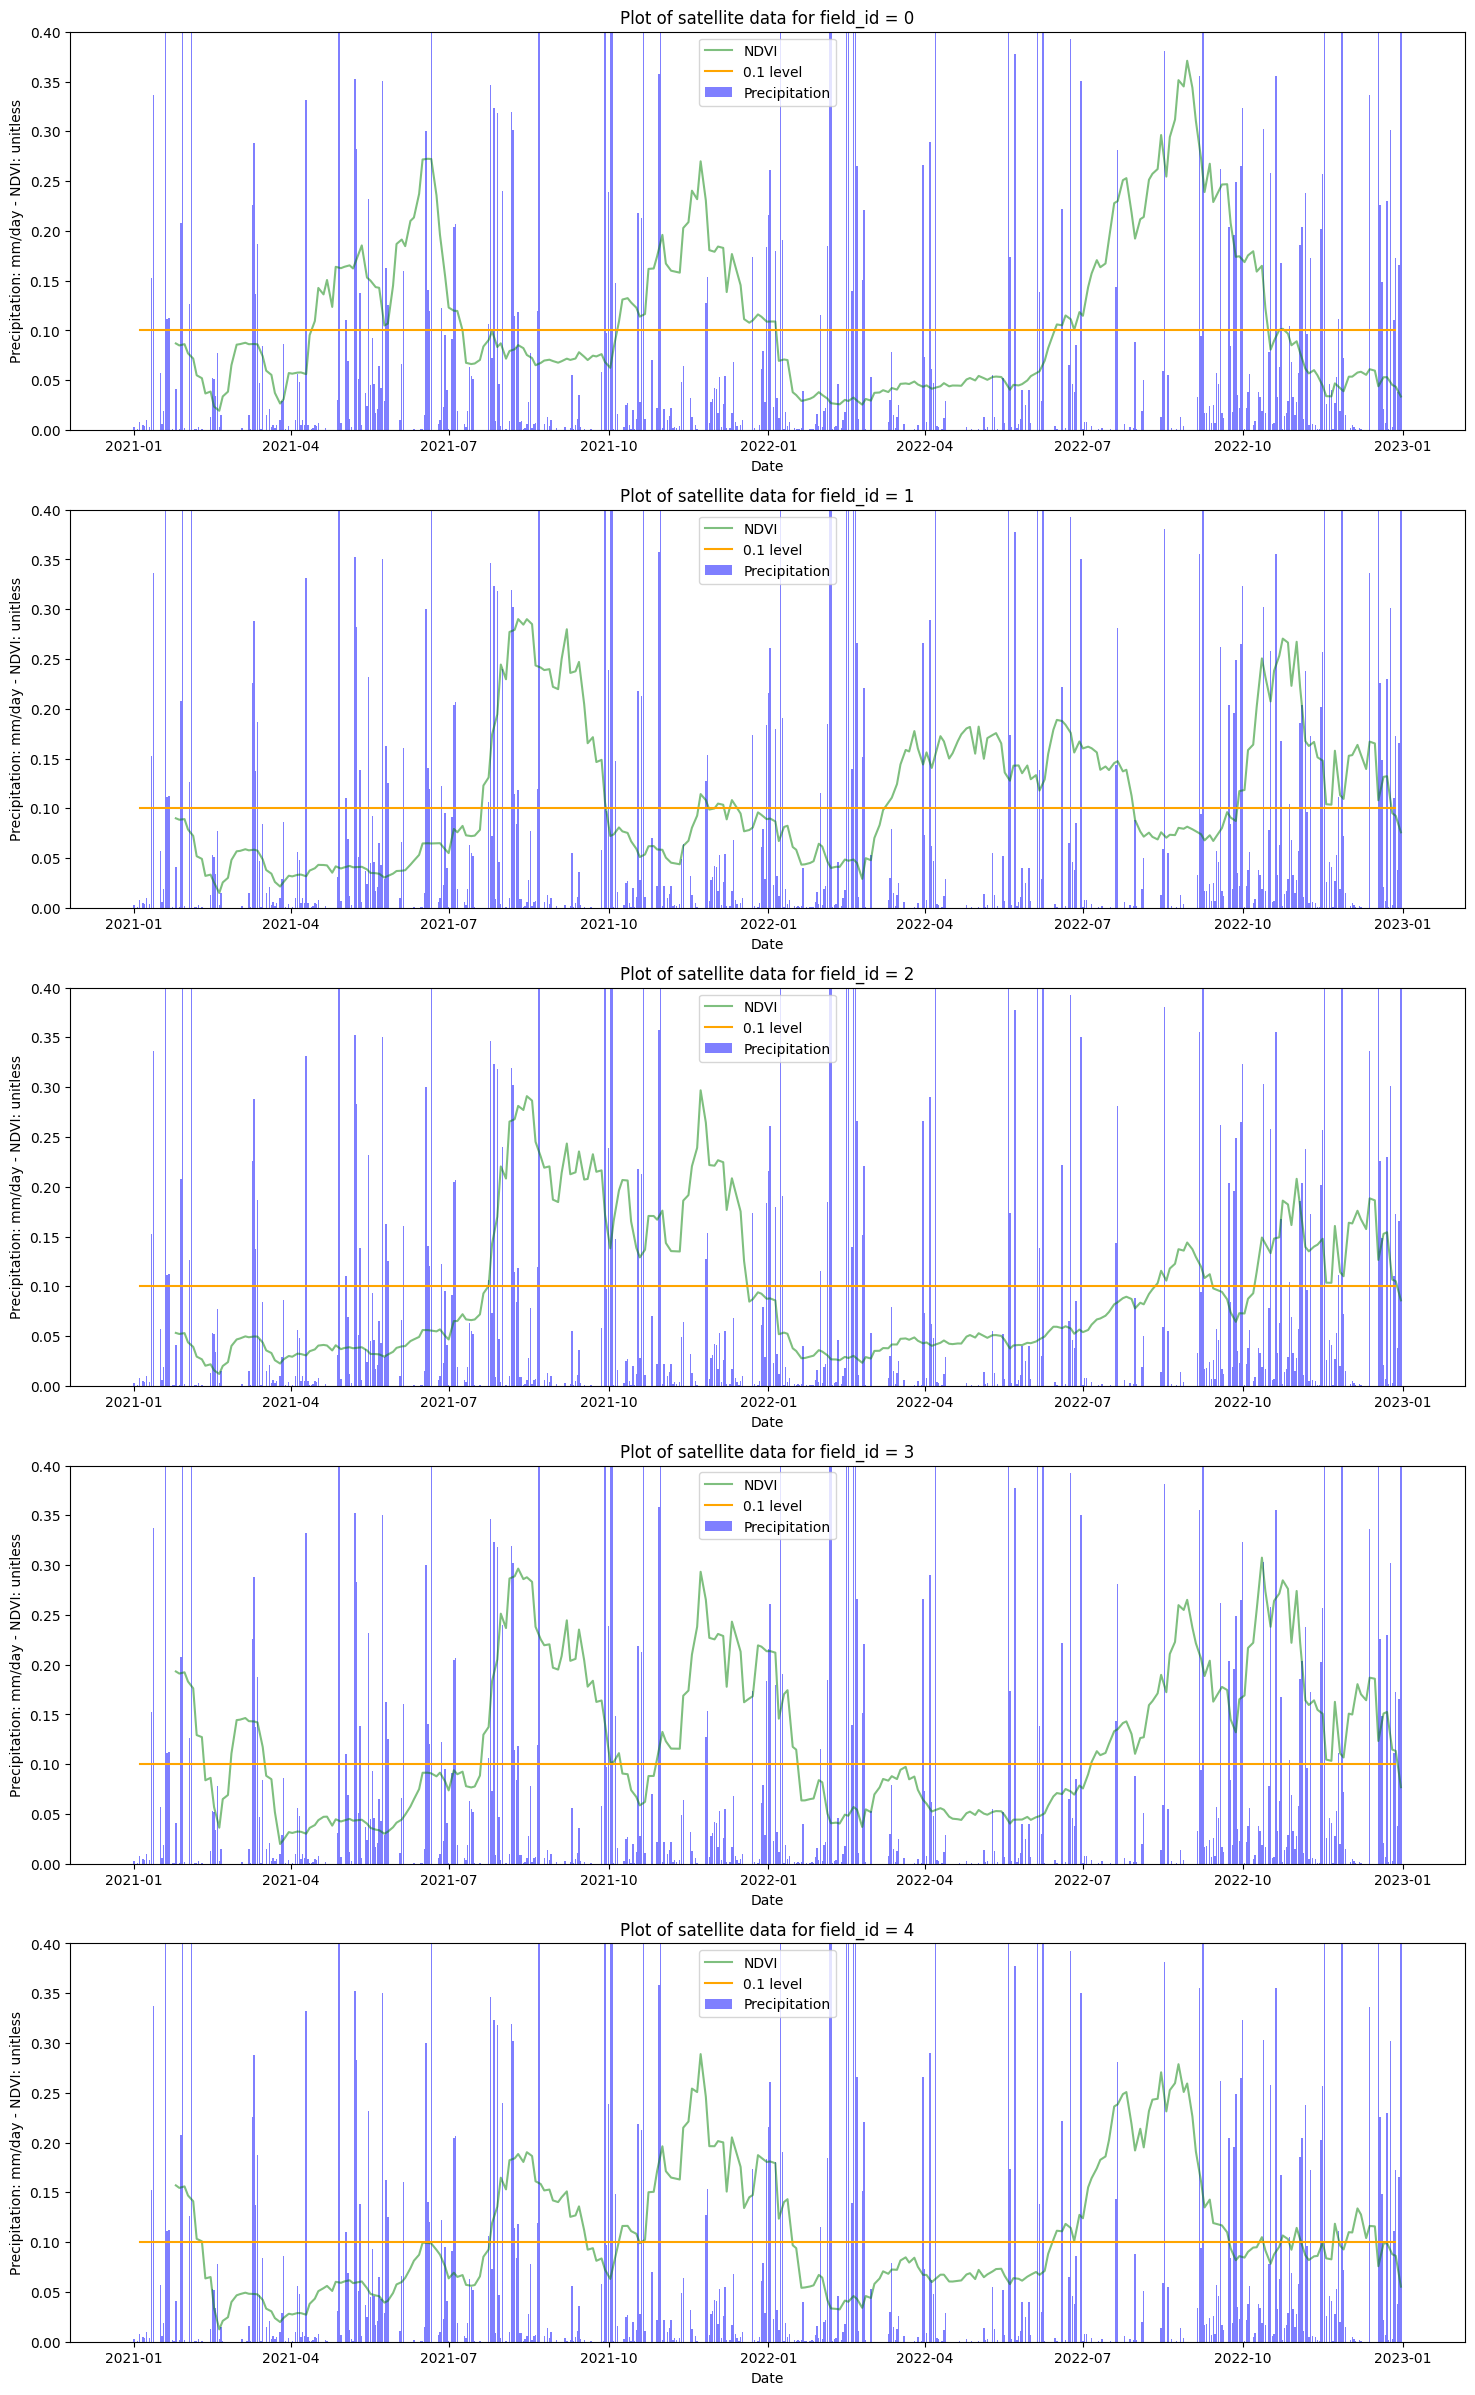

In [26]:
fig, axes = plt.subplots(5, 1, figsize=(18, 6 * 5))
for field_id in range(5):
    plot_precipitation_df = testing_precipitation_df
    precipitation = plot_precipitation_df.precipitation.rolling(1).mean()
    # axes[field_id].plot(plot_precipitation_df.date, precipitation, color='blue', alpha=0.5, label='Precipitation')

    axes[field_id].bar(plot_precipitation_df.index, plot_precipitation_df.precipitation, color='blue', alpha=0.5, label='Precipitation')

    # soils which generally exhibit a near-infrared spectral reflectance somewhat larger than the red,
    # and thus tend to also generate rather small positive NDVI values (say 0.1 to 0.2).
    plot_ndvi_df = testing_ndvi_df.xs(field_id, level=1)
    NDVI = plot_ndvi_df.NDVI.rolling(10).mean()
    axes[field_id].plot(plot_ndvi_df.index, NDVI, color='green', alpha=0.5, label='NDVI')
    # ax.bar(plot_ndvi_df.date, plot_ndvi_df.NDVI, color='green', alpha=0.5, label='NDVI')

    axes[field_id].axhline(y=0.1, xmin=0.05, xmax=0.95, color='orange', label='0.1 level')

    axes[field_id].set_xlabel('Date')
    axes[field_id].set_ylabel('Precipitation: mm/day - NDVI: unitless')
    axes[field_id].set_title(f'Plot of satellite data for field_id = {field_id}')
    axes[field_id].legend()
    axes[field_id].set_ylim([0, 0.4])